In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/rashe/Downloads/archive/train.csv")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df.shape

(9800, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
null_values = df['Postal Code'].isnull().sum()
print(f"Number of null values in 'Postal Code' column: {null_values}")

Number of null values in 'Postal Code' column: 11


In [9]:
df['Postal Code'] = df['Postal Code'].fillna(0, inplace=True)
df['Postal Code'].isnull().sum()


C:\Users\rashe\AppData\Local\Temp\ipykernel_40748\2816151730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'] = df['Postal Code'].fillna(0, inplace=True)


9800

In [10]:
df['Postal Code'] = df['Postal Code'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
df.describe()

,Row ID,Sales
count,9800.000000,9800.000000
mean,4900.500000,230.769059
std,2829.160653,626.651875
min,1.000000,0.444000
25%,2450.750000,17.248000
50%,4900.500000,54.490000
75%,7350.250000,210.605000
max,9800.000000,22638.480000


In [12]:
if df.duplicated().any():
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


In [13]:
types_of_customers = df['Segment'].unique()
print("Types of customers in the dataset:", types_of_customers)

Types of customers in the dataset: ['Consumer' 'Corporate' 'Home Office']


In [14]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment': 'Types of Customer', 'count': 'Total Number of Customers'})
print(number_of_customers)


  Types of Customer  Total Number of Customers
0          Consumer                       5101
1         Corporate                       2953
2       Home Office                       1746


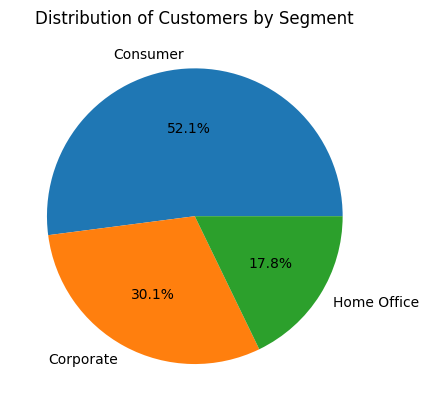

In [15]:
plt.pie(number_of_customers['Total Number of Customers'], labels=number_of_customers['Types of Customer'], autopct='%1.1f%%')
plt.title('Distribution of Customers by Segment')
plt.show()  

In [16]:
sale_per_customer = df.groupby('Segment')['Sales'].sum().reset_index()
sale_per_customer = sale_per_customer.rename(columns={'Sales': 'Total Sales'})
print(sale_per_customer)

       Segment   Total Sales
0     Consumer  1.148061e+06
1    Corporate  6.884941e+05
2  Home Office  4.249822e+05


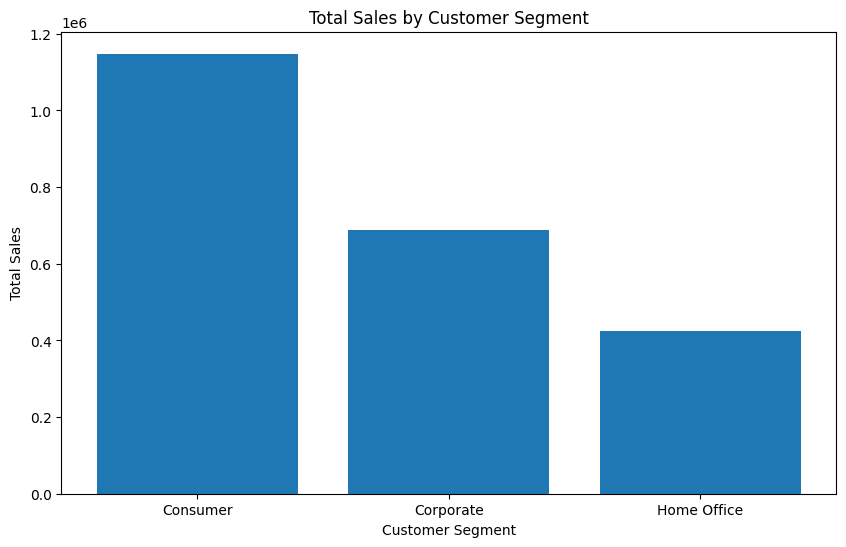

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(sale_per_customer['Segment'], sale_per_customer['Total Sales'])
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

In [21]:
customer_order_count = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
customer_order_count = customer_order_count.rename(columns={'Order ID': 'Total Orders'})
top_customers = customer_order_count.groupby('Customer Name')['Total Orders'].sum().nlargest(10)
print(top_customers)

Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
Jonathan Doherty       32
Seth Vernon            32
Arthur Prichep         31
Emily Phan             31
Zuschuss Carroll       31
Name: Total Orders, dtype: int64


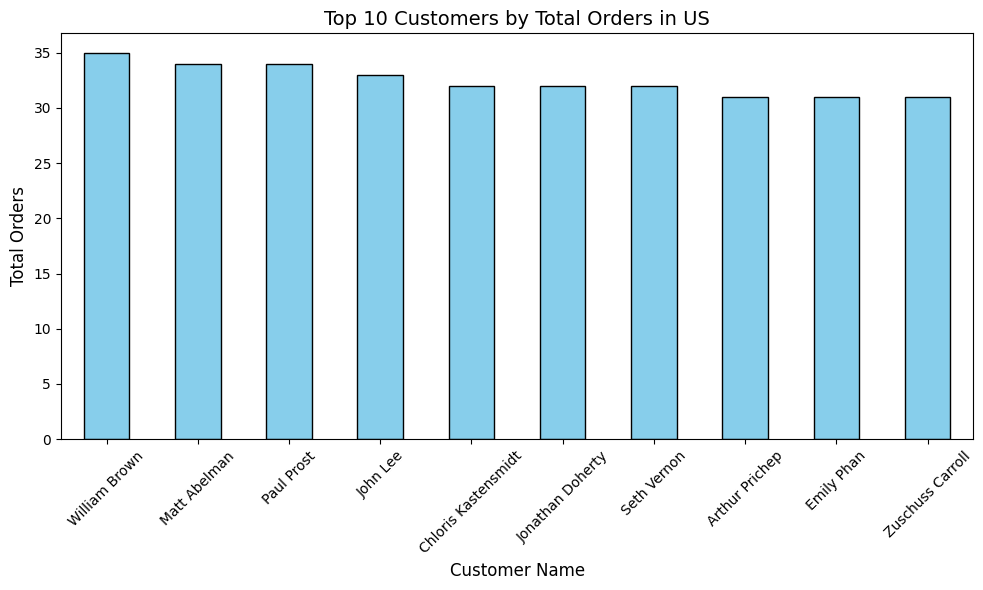

In [25]:
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Customers by Total Orders in US', fontsize=14)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [35]:
customer_sales = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()
top_customer_sales = customer_sales.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().nlargest(10)
print(top_customer_sales)

Customer ID  Customer Name       Segment    
SM-20320     Sean Miller         Home Office    25043.050
TC-20980     Tamara Chand        Corporate      19052.218
RB-19360     Raymond Buch        Consumer       15117.339
TA-21385     Tom Ashbrook        Home Office    14595.620
AB-10105     Adrian Barton       Consumer       14473.571
KL-16645     Ken Lonsdale        Consumer       14175.229
SC-20095     Sanjit Chand        Consumer       14142.334
HL-15040     Hunter Lopez        Consumer       12873.298
SE-20110     Sanjit Engle        Consumer       12209.438
CC-12370     Christopher Conant  Consumer       12129.072
Name: Sales, dtype: float64
